# DAT210x - Programming with Python for DS

## Module4- Lab5

In [55]:
import pandas as pd

from scipy import misc
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
import matplotlib.pyplot as plt

In [56]:
# Look pretty...

# matplotlib.style.use('ggplot')
plt.style.use('ggplot')

Create a regular Python list (not NDArray) and name it `samples`:

In [57]:
samples = list()
#samples = list(5*i for i in range(0,72))

Code up a for-loop that iterates over the images in the `Datasets/ALOI/32/` folder. Look in the folder first, so you know how the files are organized, and what file number they start from and end at.

Load each `.png` file individually in your for-loop using the instructions provided in the Feature Representation reading. Once loaded, flatten the image into a single-dimensional NDArray and append it to your `samples` list.

**Optional**: You can resample the image down by a factor of two if you have a slower computer. You can also scale the image from `0-255` to `0.0-1.0` if you'd like--doing so shouldn't have any effect on the algorithm's results.

In [58]:
import os

for fnames in os.listdir("C:/Users/hp/DAT210x/Module4/Datasets/ALOI/32"):
    if(fnames.endswith(".png") or fnames.endswith(".jpg")):
        file = os.path.join('Datasets/ALOI/32', fnames)
        img = misc.imread(file)
        reduce_factor = 1
        img = img[::reduce_factor][::reduce_factor]
        samples.append((img/255.).reshape(-1))
    
print(len(samples))

72


Convert `samples` to a DataFrame named `df`:

In [59]:
df = pd.DataFrame(samples)

Import any necessary libraries to perform Isomap here, reduce `df` down to three components and using `K=6` for your neighborhood size:

In [71]:
from sklearn import manifold

i = 6
iso = manifold.Isomap(n_neighbors = i, n_components = 3)
iso.fit(df)
m = iso.transform(df)

m.shape

(72, 3)

In [61]:
def Plot2D(T, title, x, y, n_neighbors = 6):
    # This method picks a bunch of random samples (images in your case)
    # to plot onto the chart:
    fig = plt.figure()
    
    ax = fig.add_subplot(111)
    ax.set_title(title + "n_neighbors:" + str(i))
    ax.set_xlabel('Component: {0}'.format(x))
    ax.set_ylabel('Component: {0}'.format(y))
    
    x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
    y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
    
    # It also plots the full scatter:
    ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)
    
def Plot3D(T, title, x, y, z, n_neighbors = 6):
    # This method picks a bunch of random samples (images in your case)
    # to plot onto the chart:
    fig = plt.figure()
    
    ax = fig.add_subplot(111, projection = "3d")
    ax.set_title(title)
    ax.set_xlabel('Component: {0}'.format(x))
    ax.set_ylabel('Component: {0}'.format(y))
    ax.set_zlabel('Component: {0}'.format(z))
    
    x_size = (max(T[:,x]) - min(T[:,x])) * 0.08
    y_size = (max(T[:,y]) - min(T[:,y])) * 0.08
    z_size = (max(T[:,z]) - min(T[:,z])) * 0.08

    # It also plots the full scatter:
    ax.scatter(T[:,x],T[:,y], marker='.',alpha=0.7)

Create a 2D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker. Graph the first two isomap components:

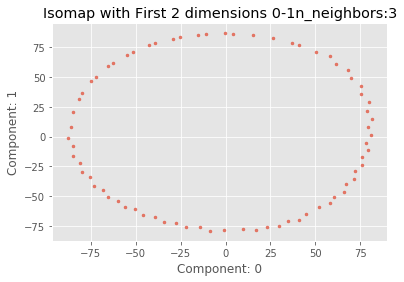

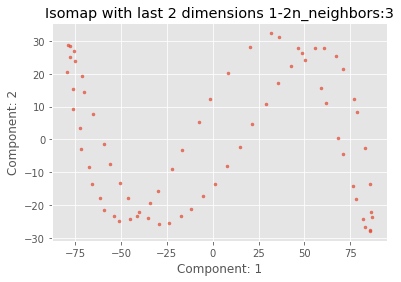

In [70]:
Plot2D(m, "Isomap with First 2 dimensions 0-1", 0, 1, i)
Plot2D(m, "Isomap with last 2 dimensions 1-2", 1, 2, i)
plt.show()

In [72]:
from sklearn import manifold
for i in range(1,7):
    iso = manifold.Isomap(n_neighbors = i, n_components = 3)
    iso.fit(df)
    m = iso.transform(df)
    
    Plot2D(m, "Isomap with First 2 dimensions 0-1", 0, 1, i)
    Plot2D(m, "Isomap with last 2 dimensions 1-2", 1, 2, i)

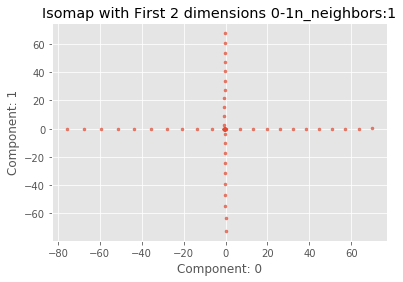

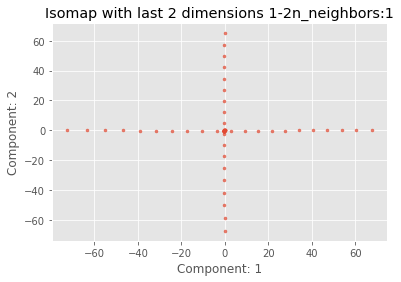

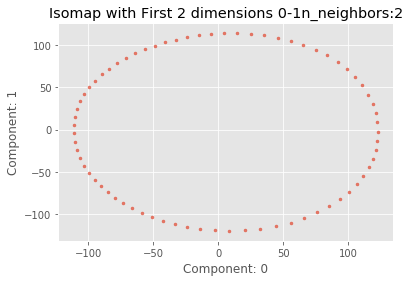

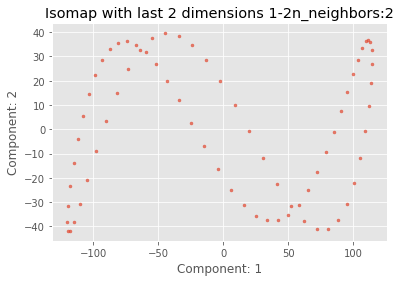

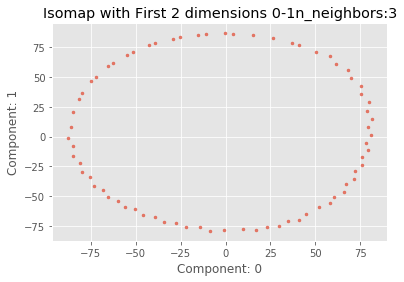

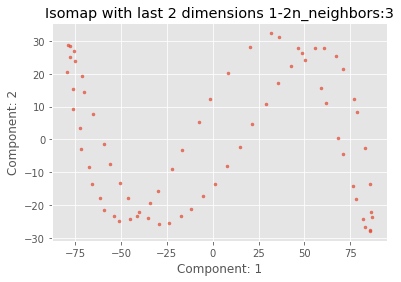

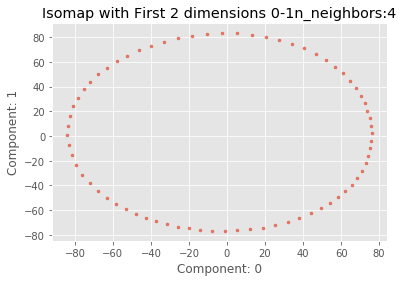

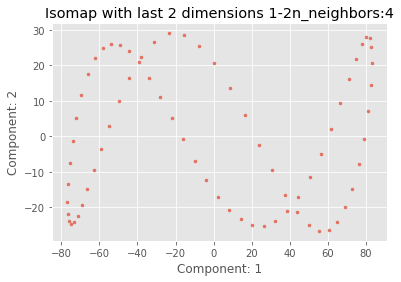

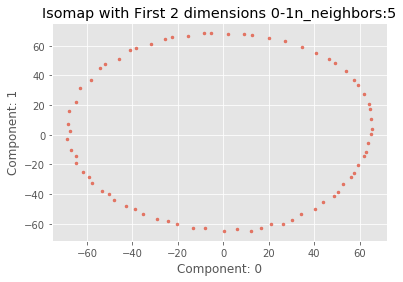

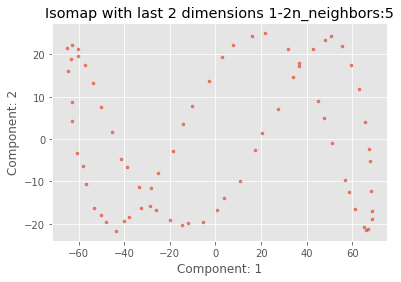

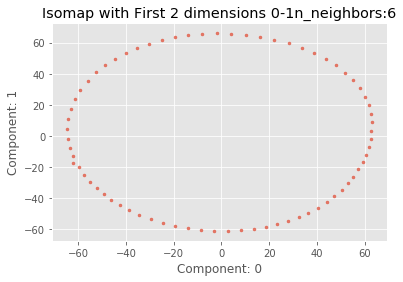

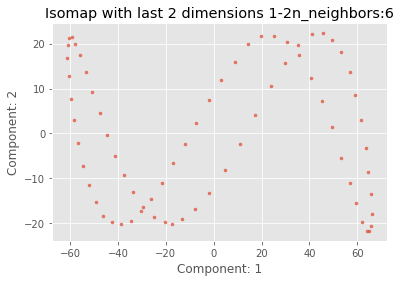

In [73]:
plt.show()

Chart a 3D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker:

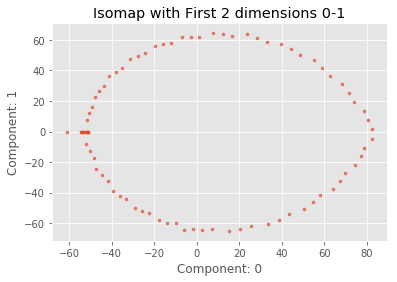

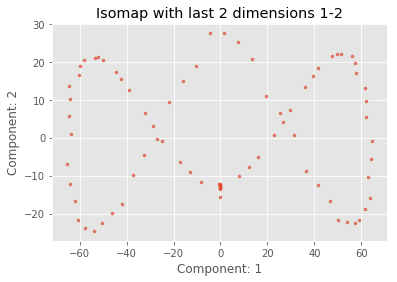

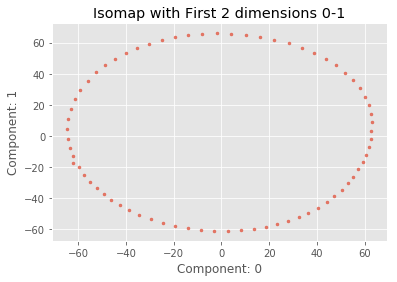

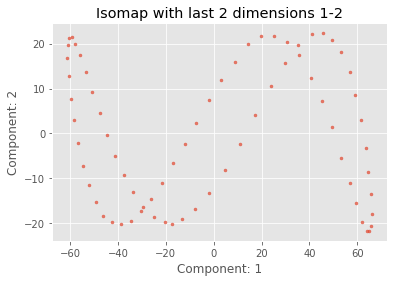

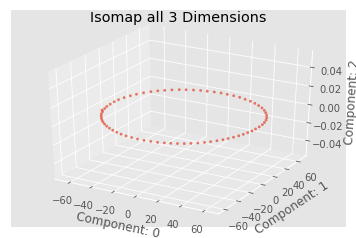

In [35]:
Plot3D(m, "Isomap all 3 Dimensions", 0, 1, 2)
plt.show()

Answer the first two lab questions!

Create another for loop. This time it should iterate over all the images in the `Datasets/ALOI/32_i` directory. Just like last time, load up each image, process them the way you did previously, and append them into your existing `samples` list:

In [36]:
for fnames in os.listdir("C:/Users/hp/DAT210x/Module4/Datasets/ALOI/32i"):
    if(fnames.endswith(".png") or fnames.endswith(".jpg")):
        file = os.path.join('Datasets/ALOI/32i', fnames)
        img = misc.imread(file)
        reduce_factor = 1
        img = img[::reduce_factor][::reduce_factor]
        samples.append((img/255.).reshape(-1))
    
print(len(samples))

84


Convert `samples` to a DataFrame named `df`:

In [37]:
df = pd.DataFrame(samples)

Import any necessary libraries to perform Isomap here, reduce `df` down to three components and using `K=6` for your neighborhood size:

In [42]:
from sklearn.manifold import Isomap

iso = Isomap(n_neighbors = 6, n_components = 3)
iso.fit(df)
m1 = iso.transform(df)

Create a 2D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker. Graph the first two isomap components:

In [43]:
Plot2D(m1, "Isomap with First 2 dimensions 0-1", 0, 1)
Plot2D(m1, "Isomap with last 2 dimensions 1-2", 1, 2)

Chart a 3D Scatter plot to graph your manifold. You can use either `'o'` or `'.'` as your marker:

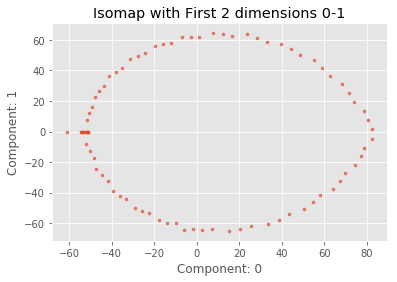

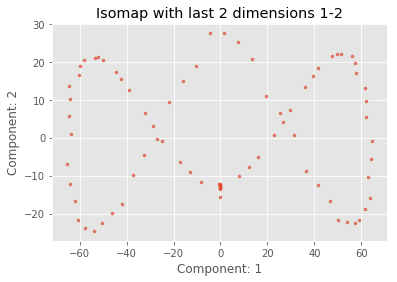

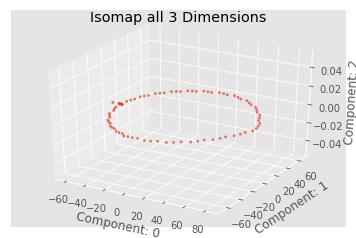

In [44]:
Plot3D(m1, "Isomap all 3 Dimensions", 0, 1, 2)
plt.show()